# Classification Model with Scikit-learn

### Table of Contents

* [1. Explore and prepare Titanic dataset](#ch1)
* [2. Preprocessing the data](#ch2)
* [3. Logistic Regression](#ch3)
* [4. Multiple Classification Model](#ch4)
    * [4.1. Logistic Regression](#ch4_1)
    * [4.2. Linear Discriminant Analysis](#ch4_2)
    * [4.3. Quadratic Discriminant Analysis](#ch4_3)
    * [4.4. Stochastic Gradient Descent](#ch4_4)
    * [4.5. Support Vector Machines](#ch4_5)
    * [4.6. Nearest Neighbors](#ch4_6)
    * [4.7. Decision Trees](#ch4_7)
        * [4.7.1 Decision Trees](#ch4_7_1)
        * [4.7.2 Random Forest](#ch4_7_2)
    * [4.8. Naive Bayes](#ch4_8)
    * [4.9. Gradient Boosting Machines](#ch4_9)
    * [4.10 Ensemble Methods](#ch4_10)
    * [4.11 Maximum de vraisemblance](#ch4_11)
* [5. Hyperparameter tuning](#ch5)
    * [5.1. Decision Tree](#ch5_1)
    * [5.2. Logistic Regression](#ch5_2)
* [6. Classification  images models](#ch6)
    * [6.1. Prepare data](#ch6_1)
    * [6.2. Logistic Regression](#ch6_2)


In [1]:
import sklearn 
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Explore and prepare Titanic dataset <a class="anchor" id="ch1"></a>

In [2]:
titanic_df = pd.read_csv('datasets/train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
titanic_df=titanic_df.dropna()

In [5]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [6]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [7]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [8]:
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

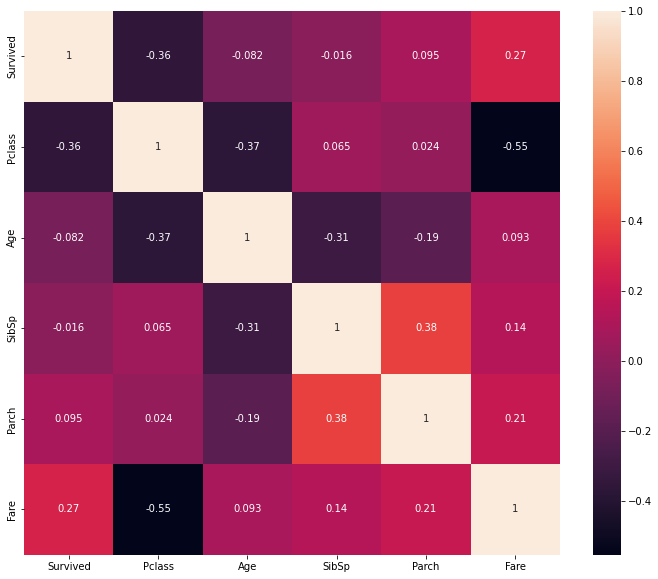

In [9]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(titanic_data_corr,annot=True)

## 2. Preprocessing the data <a class="anchor" id="ch2"></a>

In [10]:
### we want only numeric values

In [11]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [12]:
titanic_df=pd.get_dummies(titanic_df,columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [13]:
# Shuffle the record
titanic_df=titanic_df.sample(frac=1).reset_index(drop=True) # frac=1 -> select all the dataset
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,64.0,1,4,263.0000,0,0,1
1,0,3,1,44.0,0,0,8.0500,0,0,1
2,1,3,1,26.0,0,0,56.4958,0,0,1
3,0,1,1,54.0,0,0,51.8625,0,0,1
4,0,3,0,41.0,0,2,20.2125,0,0,1


In [14]:
titanic_df.to_csv('datasets/titanic_processed.csv',index=False)

## 3. Logistic Regression <a class="anchor" id="ch3"></a>

In [15]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop('Survived',axis=1)
Y = titanic_df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
# liblinear est un solver pour les pb d optimisation, efficace pour les petit dataset et classification binaire
# liblinear utilise coordinate descent gradient comme model d'opti
# penality regularize the model by applying a penalty on overly complex model
#C: the strength of the regularization, smaller values indicate stronger regularization
logistic_model = LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train, y_train)

In [17]:
y_pred=logistic_model.predict(x_test)

In [18]:
pred_results=pd.DataFrame({'y_test' : y_test , 'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
215,1,1
537,0,0
14,0,1
137,1,1
351,0,0


In [19]:
titani_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
titani_crosstab

y_test,0,1
y_pred,,
0,68,19
1,18,38


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("accuracy : ", acc) # how many value is right
print("precision : ", prec) # how many true are realy true
print("recall : ", recall) # how many real true are predict

accuracy :  0.7412587412587412
precision :  0.6785714285714286
recall :  0.6666666666666666


## 4. Multiple Classification Model <a class="anchor" id="ch4"></a>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB


In [22]:
FEATURES = list(titanic_df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [23]:
result_dict = {}

In [24]:
def summarize_classification(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return {'accuracy': acc,'precision': prec,'recall': recall,'accuracy_count': num_acc}

In [25]:
def build_model(classifier_fn,name_of_y_col,name_of_x_cols,dataset,test_frac=0.2):
    X = dataset[name_of_x_cols]
    Y = dataset[name_of_y_col]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_frac)
    model = classifier_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)
    pred_results =pd.DataFrame({'y_test' : y_test , 'y_pred': y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
    return {'training': train_summary, 'test' : test_summary, 'confusion_matrix': model_crosstab}


In [26]:
def compare_results():
    for key in result_dict:
        print('Classification: ',key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
        print()

### 4.1. Logistic Regression <a class="anchor" id="ch4_1"></a>

In [27]:
def logistic_regression(x_train,y_train):
    # model d'optimisation: Limited-memory Broyden–Fletcher–Goldfarb–Shanno
    model = LogisticRegression(penalty='l2',C=1.0,solver='liblinear')
    model.fit(x_train,y_train)
    return model

In [28]:
result_dict['surived - logistic_regression'] = build_model(logistic_regression,'Survived',FEATURES[0:-1],titanic_df)

### 4.2. Linear Discriminant Analysis <a class="anchor" id="ch4_2"></a>

In [29]:
def linear_discriminant(x_train,y_train,solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train,y_train)
    return model

In [30]:
result_dict['surived - linear_discriminant_analysis'] = build_model(linear_discriminant,'Survived',FEATURES[0:-1],titanic_df)

### 4.3. Quadratic Discriminant Analysis <a class="anchor" id="ch4_3"></a>

In [31]:
def quadratic_discriminant(x_train,y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train,y_train)
    return model

In [32]:
result_dict['surived - quadratic_discriminant_analysis'] = build_model(quadratic_discriminant,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116



### 4.4 Stochastic Gradient Descent <a class="anchor" id="ch4_4"></a>

In [33]:
# stop when loss value < tol or iter >1000
def sgd(x_train,y_train,max_iter=10000,tol=1e-3):
    model = SGDClassifier(max_iter=max_iter,tol=tol)
    model.fit(x_train,y_train)
    return model

In [34]:
result_dict['surived - Stochastique gradient descent'] = build_model(sgd,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116

Classification:  surived - Stochastique gradient descent

Training data
accuracy 0.37785588752196836
precision 0.3764705882352941
recall 0.8421052631578947
acc

### 4.5. Support Vector Machines <a class="anchor" id="ch4_5"></a>

In [35]:
# C : inverse of the regularization strenght, penalize points on the wrong side of the margin
def linear_svg(x_train,y_train,C=1.0,max_iter=1000,tol=1e-3):
    #LinearSVC(...) == SVC(kernel="linear", ...)
    # dual : convert primal problem to dual problem 
    # Prefer dual=False when n_samples > n_features
    model = LinearSVC(C=C,max_iter=max_iter,tol=tol,dual=False)
    model.fit(x_train,y_train)
    return model

In [36]:
result_dict['surived - Linear SVC'] = build_model(linear_svg,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116

Classification:  surived - Stochastique gradient descent

Training data
accuracy 0.37785588752196836
precision 0.3764705882352941
recall 0.8421052631578947
acc

### 4.6.Nearest Neighbors <a class="anchor" id="ch4_6"></a>

In [37]:
def radius_neighbor(x_train,y_train,radius=40.0):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train,y_train)
    return model

In [38]:
result_dict['surived - radius neighbor'] = build_model(radius_neighbor,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116

Classification:  surived - Stochastique gradient descent

Training data
accuracy 0.37785588752196836
precision 0.3764705882352941
recall 0.8421052631578947
acc

### 4.7. Decision Trees <a class="anchor" id="ch4_7"></a>

#### 4.7.1Decision Trees <a class="anchor" id="ch4_7_1"></a>

In [39]:
def decision_tree(x_train,y_train,max_depth=None,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(x_train,y_train)
    return model

In [40]:
result_dict['surived - decision tree'] = build_model(decision_tree,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116

Classification:  surived - Stochastique gradient descent

Training data
accuracy 0.37785588752196836
precision 0.3764705882352941
recall 0.8421052631578947
acc

#### 4.7.2 Random forest <a class="anchor" id="ch4_7_2"></a>

Le modèle Random Forest est une extension des arbres de décision. Il combine plusieurs arbres de décision pour améliorer la performance et la robustesse du modèle. C'est un algorithme très populaire en apprentissage automatique en raison de sa capacité à gérer de grandes quantités de données et à éviter le surapprentissage.

### 4.8. Naive Bayes <a class="anchor" id="ch4_8"></a>

In [41]:
def naive_bayes(x_train,y_train,priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train,y_train)
    return model

In [42]:
result_dict['surived - naive bayes'] = build_model(naive_bayes,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116

Classification:  surived - Stochastique gradient descent

Training data
accuracy 0.37785588752196836
precision 0.3764705882352941
recall 0.8421052631578947
acc

### 4.9. Gradient Boosting Machines <a class="anchor" id="ch4_9"></a>

Les machines à gradient boosting (Gradient Boosting Machines ou GBM) sont une autre approche ensembliste qui combine plusieurs modèles faibles (généralement des arbres de décision) pour créer un modèle fort. Les GBM sont également très performantes et sont largement utilisées dans des compétitions de modèles prédictifs (comme Kaggle) et des projets pratiques.

### 4.10. Ensemble Methods <a class="anchor" id="ch4_10"></a>

Les méthodes d'ensemble telles que le vote majoritaire, le vote pondéré et le bagging sont également importants à considérer. Ces méthodes combinent les prédictions de plusieurs modèles pour améliorer la performance globale.

### 4.11. Maximum de vraisemblance <a class="anchor" id="ch4_11"></a> 

Voir notebook - classification image par maximum de vraisemblance

La classification par maximum de vraisemblance (Maximum Likelihood Classification en anglais) est une approche de classification probabiliste couramment utilisée en apprentissage automatique. L'objectif de cette méthode est de classifier des données dans différentes classes en utilisant des modèles probabilistes.

Le principe fondamental de la classification par maximum de vraisemblance repose sur la recherche du modèle probabiliste qui maximise la probabilité (ou la vraisemblance) d'observer les données réelles à partir de ce modèle. En d'autres termes, on cherche à estimer les paramètres du modèle qui rendent les données observées les plus probables selon ce modèle.

Voici les étapes clés de la classification par maximum de vraisemblance :

Choix du modèle probabiliste : Avant de commencer la classification, il est nécessaire de choisir un modèle probabiliste approprié pour représenter les données dans chaque classe. Le choix du modèle dépend de la nature des données et du domaine d'application. Par exemple, dans le cas de données binaires, on peut utiliser la loi de Bernoulli, tandis que pour des données continues, on peut utiliser une distribution normale (loi gaussienne).

Estimation des paramètres : Une fois que le modèle probabiliste est choisi, l'étape suivante consiste à estimer les paramètres du modèle à partir des données d'entraînement. L'estimation des paramètres est réalisée en utilisant les données d'entraînement et la méthode du maximum de vraisemblance, qui consiste à trouver les valeurs des paramètres qui maximisent la probabilité d'observer les données réelles à partir du modèle.

Classification : Une fois que les paramètres du modèle sont estimés, le modèle probabiliste est utilisé pour effectuer des prédictions sur de nouvelles données. Pour chaque nouvelle observation, le modèle calcule la probabilité que cette observation appartienne à chaque classe. La classe avec la probabilité la plus élevée est alors attribuée à l'observation.

In [60]:
def maximum_likelihood_bernoulli_classification(x_train, y_train):
    model = BernoulliNB()
    model.fit(x_train, y_train)
    return model

# correspond au classifier naive bayes
def maximum_likelihood_gaussian_classification(x_train, y_train):
    model = GaussianNB()
    model.fit(x_train, y_train)
    return model


In [61]:
result_dict['surived - maximum vraisemblance bernouilli'] = build_model(maximum_likelihood_bernoulli_classification,'Survived',FEATURES[0:-1],titanic_df)
compare_results()

Classification:  surived - logistic_regression

Training data
accuracy 0.7961335676625659
precision 0.7877358490566038
recall 0.7016806722689075
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.6923076923076923
recall 0.72
accuracy_count 113

Classification:  surived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7695852534562212
recall 0.7167381974248928
accuracy_count 453

Test data
accuracy 0.7902097902097902
precision 0.7358490566037735
recall 0.7090909090909091
accuracy_count 113

Classification:  surived - quadratic_discriminant_analysis

Training data
accuracy 0.7943760984182777
precision 0.7761194029850746
recall 0.6842105263157895
accuracy_count 452

Test data
accuracy 0.8111888111888111
precision 0.7796610169491526
recall 0.7666666666666667
accuracy_count 116

Classification:  surived - Stochastique gradient descent

Training data
accuracy 0.37785588752196836
precision 0.3764705882352941
recall 0.8421052631578947
acc

## 5. Hyperparameter tuning <a class="anchor" id="ch5"></a>

### 5.1. Decision Tree <a class="anchor" id="ch5_1"></a>

In [43]:
from sklearn.model_selection import GridSearchCV
# find the max depth of the tree which give us the best machine learning model
parameters = {'max_depth' : [2,4,5,7,9,10]}
# cv : use 3-fold cross vaildation to find the best model - slpit dtaset into 3 parts
# return_train_score : compare moedel with default scoring mechanisms = accuracy
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters,cv=3,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 4}

In [44]:
for i in range(6):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])


Parameters:  {'max_depth': 2}
Mean test score:  0.79963798384851
Rank:  2
Parameters:  {'max_depth': 4}
Mean test score:  0.8031560382437576
Rank:  1
Parameters:  {'max_depth': 5}
Mean test score:  0.7891023855936137
Rank:  3
Parameters:  {'max_depth': 7}
Mean test score:  0.7838299452334541
Rank:  5
Parameters:  {'max_depth': 9}
Mean test score:  0.7873294346978558
Rank:  4
Parameters:  {'max_depth': 10}
Mean test score:  0.7767659890466908
Rank:  6


In [45]:
decision_tree_model = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth']).fit(x_train,y_train)
y_pred = decision_tree_model.predict(x_test)
summarize_classification(y_test,y_pred)

{'accuracy': 0.7202797202797203,
 'precision': 0.6545454545454545,
 'recall': 0.631578947368421,
 'accuracy_count': 103}

### 5.2. Logistic Regression <a class="anchor" id="ch5_2"></a>

In [46]:
# find penalty and C for the logistic regression which give us the best machine learning model
parameters = {'penalty' : ['l1', 'l2'], 'C' : [0.1, 0.4, 0.8, 1, 2, 5]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'),parameters,cv=3,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 5, 'penalty': 'l2'}

## 6. Classification  images models <a class="anchor" id="ch6"></a>

### 6.1. Prepare data <a class="anchor" id="ch6_1"></a>

In [47]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# use 30% of images to train our model
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

In [49]:
LOOKUP = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def display_image(features,actual_label):
    print('Actual label: ', LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))
    

In [50]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

Actual label:  Ankle boot


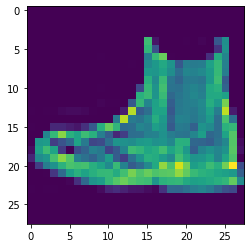

In [51]:
display_image(X.loc[5].values, Y.loc[5])

### 6.2. Logistic Regression <a class="anchor" id="ch6_2"></a>

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [53]:
def summarize_classification_images(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    # for multi_class classification return a weighted average score of prec and recall for each label
    prec = precision_score(y_test,y_pred,average=avg_method)
    recall = recall_score(y_test,y_pred,average=avg_method)
    
    return {'accuracy': acc,'precision': prec,'recall': recall,'accuracy_count': num_acc}

In [54]:
# for multi class classification prefere to use solver sag, good for big dataset
logistic_model = LogisticRegression(solver='sag',multi_class='auto',max_iter=5000).fit(x_train,y_train)


In [55]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 4, 7, ..., 4, 1, 1])

In [56]:
summarize_classification_images(y_test,y_pred)

{'accuracy': 0.7911111111111111,
 'precision': 0.7909182206787129,
 'recall': 0.7911111111111111,
 'accuracy_count': 2848}